# 工具导入和数据读取
## 工具导入

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")
 
%matplotlib inline

## 数据读取

In [3]:
'''
读取数据集
'''
test_data = pd.read_csv('./data_format1/test_format1.csv')
train_data = pd.read_csv('./data_format1/train_format1.csv')

user_info = pd.read_csv('./data_format1/user_info_format1.csv')
user_log = pd.read_csv('./data_format1/user_log_format1.csv')

In [4]:
test_data.head(3)

,user_id,merchant_id,prob
0,163968,4605,NaN
1,360576,1581,NaN
2,98688,1964,NaN


In [5]:
train_data.head(3)

,user_id,merchant_id,label
0,34176,3906,0
1,34176,121,0
2,34176,4356,1


In [6]:
user_info.head(3)

,user_id,age_range,gender
0,376517,6.0,1.0
1,234512,5.0,0.0
2,344532,5.0,0.0


In [7]:
user_log.head(3)

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
0,328862,323294,833,2882,2661.0,829,0
1,328862,844400,1271,2882,2661.0,829,0
2,328862,575153,1271,2882,2661.0,829,0


# 单变量数据分析
## 数据类型和数据大小
### 1.用户信息数据

In [8]:
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424170 entries, 0 to 424169
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    424170 non-null  int64  
 1   age_range  421953 non-null  float64
 2   gender     417734 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 9.7 MB


### 2. 用户行为数据

In [9]:
user_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54925330 entries, 0 to 54925329
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   user_id      int64  
 1   item_id      int64  
 2   cat_id       int64  
 3   seller_id    int64  
 4   brand_id     float64
 5   time_stamp   int64  
 6   action_type  int64  
dtypes: float64(1), int64(6)
memory usage: 2.9 GB


### 3. 用户购买训练数据

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260864 entries, 0 to 260863
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   user_id      260864 non-null  int64
 1   merchant_id  260864 non-null  int64
 2   label        260864 non-null  int64
dtypes: int64(3)
memory usage: 6.0 MB


### 4.用户购买测试数据

In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261477 entries, 0 to 261476
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      261477 non-null  int64  
 1   merchant_id  261477 non-null  int64  
 2   prob         0 non-null       float64
dtypes: float64(1), int64(2)
memory usage: 6.0 MB


## 缺失值查看
### 1. 用户信息数据缺失
#### 年龄缺失：
①年龄值为空的缺失率为0.5%

②年龄值缺失或者年龄值为缺省值0共计95131条数据

In [12]:
(user_info.shape[0]-user_info['age_range'].count())/user_info.shape[0]

0.005226677982884221

In [13]:
user_info[user_info['age_range'].isna()|(user_info['age_range']==0)]

,user_id,age_range,gender
28,171799,0.0,1.0
103,32350,0.0,1.0
132,210917,0.0,1.0
144,38665,0.0,1.0
146,115159,0.0,1.0
...,...,...,...
424160,97195,NaN,NaN
424162,156155,0.0,1.0
424164,297789,0.0,1.0
424166,245950,0.0,1.0


In [14]:
user_info.groupby(['age_range'])[['user_id']].count()

,user_id
age_range,
0.0,92914
1.0,24
2.0,52871
3.0,111654
4.0,79991
5.0,40777
6.0,35464
7.0,6992
8.0,1266


#### 性别缺失
①性别值为空的缺失率 1.5%

②性别值缺失或者性别为缺省值2共计16862条数据

In [15]:
(user_info.shape[0]-user_info['gender'].count())/user_info.shape[0]

0.01517316170403376

In [16]:
user_info[user_info['gender'].isna()|(user_info['gender']==2)]

,user_id,age_range,gender
10,149002,5.0,2.0
42,116591,4.0,2.0
47,182794,6.0,2.0
55,97984,5.0,2.0
72,15868,5.0,2.0
...,...,...,...
424149,65154,NaN,NaN
424152,197548,NaN,NaN
424157,388969,NaN,NaN
424160,97195,NaN,NaN


In [17]:
user_info.groupby(['gender'])[['user_id']].count()

,user_id
gender,
0.0,285638
1.0,121670
2.0,10426


#### 年龄或者性别中有一个含有缺失值
共计106330条数据

In [18]:
user_info[user_info['age_range'].isna()|(user_info['age_range']==0)|user_info['gender'].isna()|(user_info['gender']==2)]

,user_id,age_range,gender
10,149002,5.0,2.0
28,171799,0.0,1.0
42,116591,4.0,2.0
47,182794,6.0,2.0
55,97984,5.0,2.0
...,...,...,...
424160,97195,NaN,NaN
424162,156155,0.0,1.0
424164,297789,0.0,1.0
424166,245950,0.0,1.0


### 2. 用户行为数据缺失

In [19]:
user_log.isna().sum()

user_id            0
item_id            0
cat_id             0
seller_id          0
brand_id       91015
time_stamp         0
action_type        0
dtype: int64

## 观察数据分布
### 整体数据统计信息

In [20]:
user_info.describe()

,user_id,age_range,gender
count,424170.000000,421953.000000,417734.000000
mean,212085.500000,2.930262,0.341179
std,122447.476178,1.942978,0.524112
min,1.000000,0.000000,0.000000
25%,106043.250000,2.000000,0.000000
50%,212085.500000,3.000000,0.000000
75%,318127.750000,4.000000,1.000000
max,424170.000000,8.000000,2.000000


In [21]:
user_log.describe()

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
count,5.492533e+07,5.492533e+07,5.492533e+07,5.492533e+07,5.483432e+07,5.492533e+07,5.492533e+07
mean,2.121568e+05,5.538613e+05,8.770308e+02,2.470941e+03,4.153348e+03,9.230953e+02,2.854458e-01
std,1.222872e+05,3.221459e+05,4.486269e+02,1.473310e+03,2.397679e+03,1.954305e+02,8.075806e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.110000e+02,0.000000e+00
25%,1.063360e+05,2.731680e+05,5.550000e+02,1.151000e+03,2.027000e+03,7.300000e+02,0.000000e+00
50%,2.126540e+05,5.555290e+05,8.210000e+02,2.459000e+03,4.065000e+03,1.010000e+03,0.000000e+00
75%,3.177500e+05,8.306890e+05,1.252000e+03,3.760000e+03,6.196000e+03,1.109000e+03,0.000000e+00
max,4.241700e+05,1.113166e+06,1.671000e+03,4.995000e+03,8.477000e+03,1.112000e+03,3.000000e+00


### 查看用户购买训练数据中正负样本的分布

正负样本的数量：
                    total
Non-repeat buyer  244912
Repeat buyers      15952


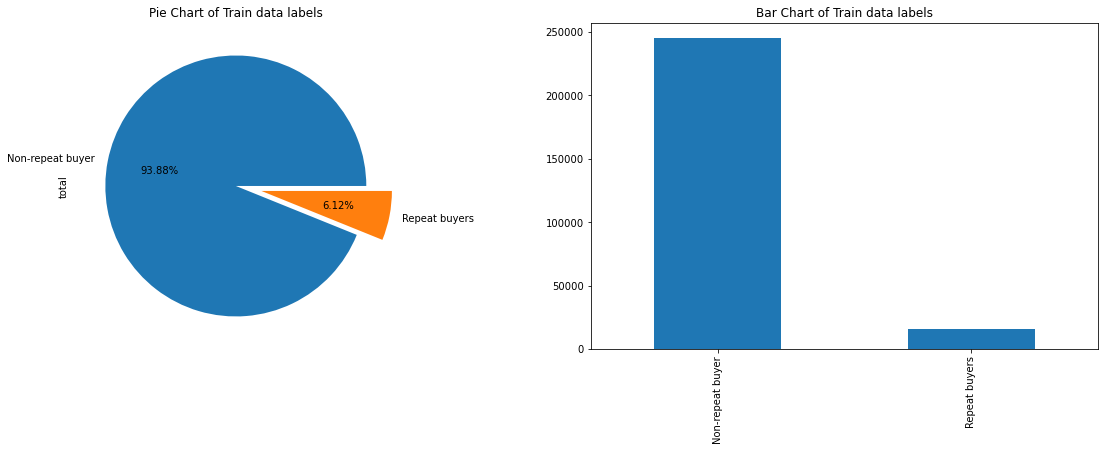

In [22]:
fig,axes = plt.subplots(1,2,figsize=(20,6))
pie_data = train_data.groupby(['label'])[['user_id']].count()
pie_data.index = pd.Series(['Non-repeat buyer','Repeat buyers'])
pie_data.columns = pd.Series(['total'])
print('正负样本的数量：\n',pie_data)

x_data = pie_data.iloc[:,0]
x_data.plot.pie(ax=axes[0],
            title='Pie Chart of Train data labels',
            autopct='%.2f%%',
            explode=(0,0.2))
x_data.plot.bar(ax=axes[1],
               title='Bar Chart of Train data labels')
plt.show()


**总结**：从上图可以看出训练样本的正负比例非常不平衡，类别不均衡将会造成分类器对数量多的类别过拟合，而对其他数量少的类别欠拟合。

**采取的措施**：

① 因为样本总数较大（>10000），根据欠采样，将一份正样本和多份负样本组合成多份训练集，训练多个模型后求平均

②调整模型的权重

**Reference**:https://www.cnblogs.com/massquantity/p/9382710.html

## 探查商店、用户、性别以及年龄对复购的影响
### 查看不同商店与复购的关系

选取Top5商店：
商店	购买次数
4044    3379
3828    3254
4173    2542
1102    2483
4976    1925
Name: merchant_id, dtype: int64


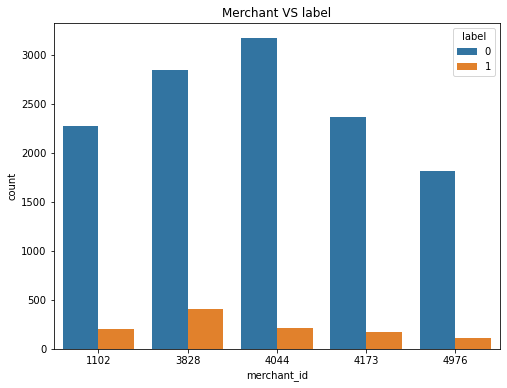

In [23]:
print("选取Top5商店：\n商店\t购买次数")
print(train_data['merchant_id'].value_counts(ascending=False).head(5))

# 选取与销量前5名的商家相关的用户购买训练数据
train_data_merchant = train_data.copy()
train_data_merchant['Top5'] = train_data_merchant['merchant_id'].map(lambda x: 1 if x in [4044,3828,4173,1102,4976] else 0)
train_data_merchant = train_data_merchant[train_data_merchant['Top5']==1]

plt.figure(figsize=(8,6))
plt.title('Merchant VS label')
ax = sns.countplot(data=train_data_merchant,x='merchant_id',hue='label')

从图中可以看出不同商店有不同的复购率，可能与不同商店售卖的商品有关，也可能与商店的运营有关。

### 复购率计算方法（以商店为例）：
**1.** 根据商店ID分组

**2.** 对每个分组内的label求和 ——> sum(label)

**3.** 根据分组内label的总数totalNumber求平均值 ——> 某商店的复购率 = sum(label)/totalNumber

### 分布直方图（如下左图）：
**1. 蓝线**：真实变量取值分布

**2. 黑线**：在真实变量取值范围内的正态分布


### QQ图（如下右图）：
**1.** 用于检查数据是否符合正态分布

**2.** Reference: https://zhuanlan.zhihu.com/p/346467939

### 查看商店复购概率分布

((array([-3.33808479, -3.08323587, -2.94165416, ...,  2.94165416,
          3.08323587,  3.33808479]),
  array([0.00483092, 0.0049505 , 0.005     , ..., 0.35      , 0.43243243,
         0.52941176])),
 (0.04432673682235347, 0.0662134249238816, 0.9093465643346749))

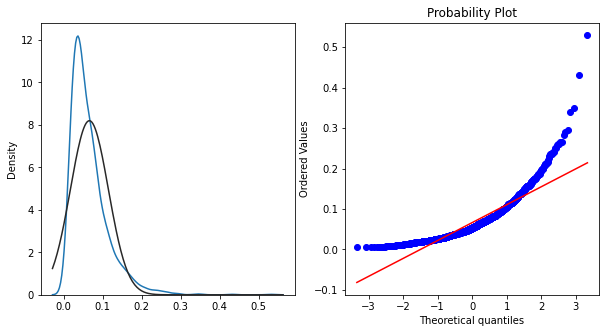

In [24]:
#筛选复购率在（0,1]范围内的商店
merchant_repeat_buy = list(train_data.groupby('merchant_id')['label'].mean())
merchant_repeat_buy = [n for n in merchant_repeat_buy if (n > 0 and n <=1) ]
# 生成商店的复购率分布直方图&qq图
plt.figure(figsize=(10,5))
ax = plt.subplot(1,2,1)
sns.distplot(merchant_repeat_buy,fit=stats.norm,hist=False)
ax = plt.subplot(1,2,2)
stats.probplot(merchant_repeat_buy,dist="norm",plot=plt)

**[Finding]**

**左图**：所有商店的大致复购率集中在0-0.3之间

**右图**：所有商店的复购率不服从正态分布

### 查看用户复购概率分布

((array([-3.91957884, -3.70033666, -3.58023444, ...,  3.58023444,
          3.70033666,  3.91957884]),
  array([0.05882353, 0.07142857, 0.08333333, ..., 1.        , 1.        ,
         1.        ])),
 (0.20565911292515038, 0.8336019676735434, 0.7952290281948186))

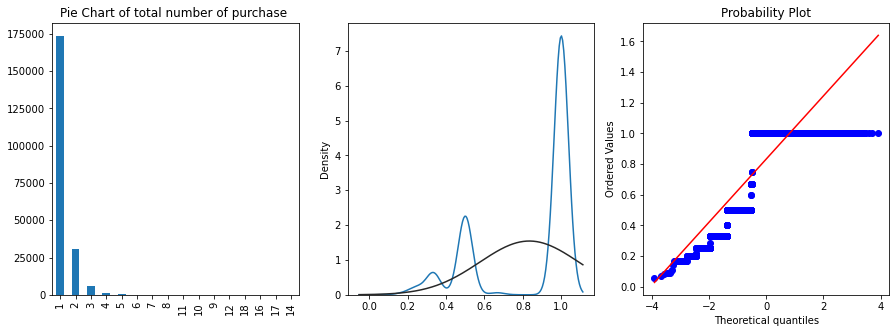

In [46]:
#筛选复购率在（0,1]范围内的用户
user_repeat_buy = list(train_data.groupby('user_id')['label'].mean())
user_repeat_buy = [n for n in user_repeat_buy if (n > 0 and n <= 1)]
# 购买总数为1-17的总数
user_buy_number = train_data.groupby(['user_id'])[['label']].count()
user_buy_number = user_buy_number['label'].value_counts()
# 生成购买总数的分布图
plt.figure(figsize=(15,5))
ax = plt.subplot(1,3,1)
user_buy_number.plot.bar(title='Pie Chart of total number of purchase ')
# 生成商店的复购率分布直方图&qq图
ax = plt.subplot(1,3,2)
sns.distplot(user_repeat_buy,hist=False,fit=stats.norm)
ax = plt.subplot(1,3,3)
stats.probplot(user_repeat_buy,dist="norm",plot=plt)

**[Finding]**

**左图**：购买总数为1次的用户最多，约为175000人

**中图**：复购率为1.0的用户最多，结合复购率的计算方法及左图的结果，推断可以看出近6个月，用户复购率很小，基本买一次为主

**右图**：所有用户的复购率不服从正态分布

In [48]:
# 根据user_id合并训练数据集和用户信息数据集
train_data_user_info = train_data.merge(user_info,on=['user_id'],how='left')
train_data_user_info.head(5)

,user_id,merchant_id,label,age_range,gender
0,34176,3906,0,6.0,0.0
1,34176,121,0,6.0,0.0
2,34176,4356,1,6.0,0.0
3,34176,2217,0,6.0,0.0
4,230784,4818,0,0.0,0.0


### 查看用户性别和复购的关系

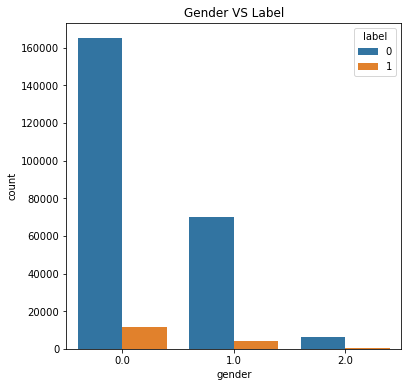

In [49]:
plt.figure(figsize=(6,6))
plt.title("Gender VS Label")
ax = sns.countplot(data=train_data_user_info,x='gender',hue='label')

女性购买次数最多，男性购买次数较少

### 查看用户不同性别的复购概率分布

In [53]:
gender_repeat_buy = train_data_user_info.groupby('gender')['label'].mean()
gender_repeat_buy

gender
0.0    0.064547
1.0    0.053813
2.0    0.069025
Name: label, dtype: float64

**gender**: 0:女性 | 1：男性 | 2：未知

((array([-0.81932862,  0.        ,  0.81932862]),
  array([0.05381257, 0.06454703, 0.06902477])),
 (0.009283334490793665, 0.06246145901587707, 0.9729449031244433))

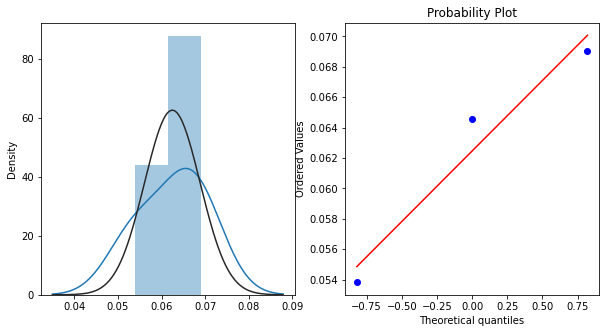

In [55]:
#筛选复购率在（0,1]范围内的用户性别数据
gender_repeat_buy = list(train_data_user_info.groupby('gender')['label'].mean())
gender_repeat_buy = [n for n in gender_repeat_buy if (n > 0 and n <= 1)]
# 生成不同性别的复购率分布直方图&qq图
plt.figure(figsize=(10,5))
ax = plt.subplot(1,2,1)
sns.distplot(gender_repeat_buy,fit=stats.norm)
ax = plt.subplot(1,2,2)
stats.probplot(gender_repeat_buy,dist="norm",plot=plt)

左图中两个柱形分别表示男性复购率和女性复购率（从左往右）。

从上述概率分布直方图中可以看出男女的复购率有很大区别。
### 查看用户年龄与复购的关系

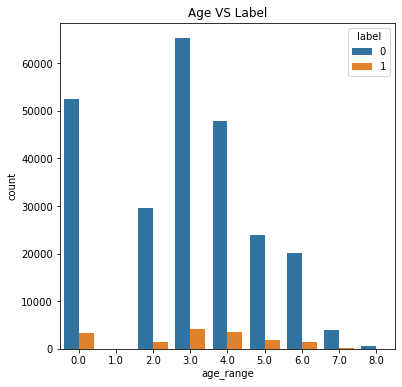

In [56]:
plt.figure(figsize=(6,6))
plt.title('Age VS Label')
ax = sns.countplot(data=train_data_user_info,x='age_range',hue='label')

### 查看用户年龄的复购概率分布

**age**: **<18岁**为1  |  **[18,24]** 为2  |  **[25,29]** 为3  |  **[30,34]** 为4  |  **[35,39]** 为5  |  **[40,49]** 为6  |  **> = 50** 为7和8  |  **0和NULL**表示未知

((array([-1.38519806, -0.83757156, -0.46579419, -0.15039337,  0.15039337,
          0.46579419,  0.83757156,  1.38519806]),
  array([0.04934571, 0.0588159 , 0.05895107, 0.06043689, 0.06721967,
         0.06833786, 0.06944444, 0.06998985])),
 (0.007498699516188002, 0.06281767501013144, 0.940857213694818))

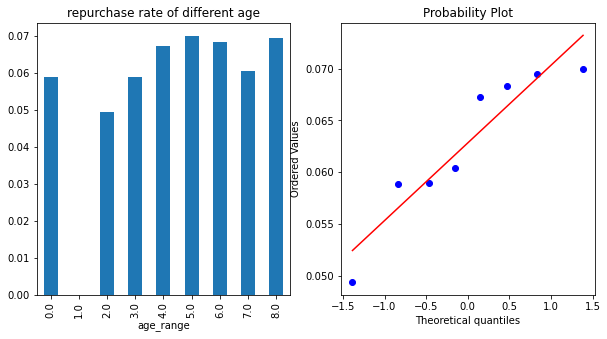

In [63]:
age_repeat_buy = list(train_data_user_info.groupby('age_range')['label'].mean())
age_repeat_buy = [n for n in age_repeat_buy if (n > 0 and n <= 1)]
different_age_buy = train_data_user_info.groupby('age_range')['label'].mean()


plt.figure(figsize=(10,5))
ax = plt.subplot(1,2,1)
different_age_buy.plot.bar(title='repurchase rate of different age')
# ax = plt.subplot(1,3,2)
# sns.distplot(age_repeat_buy,fit=stats.norm)
ax = plt.subplot(1,2,2)
stats.probplot(age_repeat_buy,dist="norm",plot=plt)

**[Finding]**

**左图**：不同年龄段的用户的复购率不同，<18岁无购物记录

**右图**：所有用户的复购率不服从正态分布